1. Import data and python packages

In [44]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc('font', size = 14)
import seaborn as sns
sns.set(style = 'white')
sns.set(style='whitegrid', color_codes = True)
import warnings
warnings.simplefilter(action='ignore')

In [45]:
train_df = pd.read_csv('titanic_train_dataset.csv')

test_df = pd.read_csv('titanic_test_dataset.csv')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
train_df.shape

(891, 12)

In [47]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [48]:
test_df.shape

(418, 11)

2. Data quality and missing value

In [49]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age - Missing values

In [50]:
print('Percentage of missing "Age" records is %.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0])*100))


Percentage of missing "Age" records is 19.87%


~20% of entries for passenger age are missing. Let's see what the 'Age' variable looks like in general.

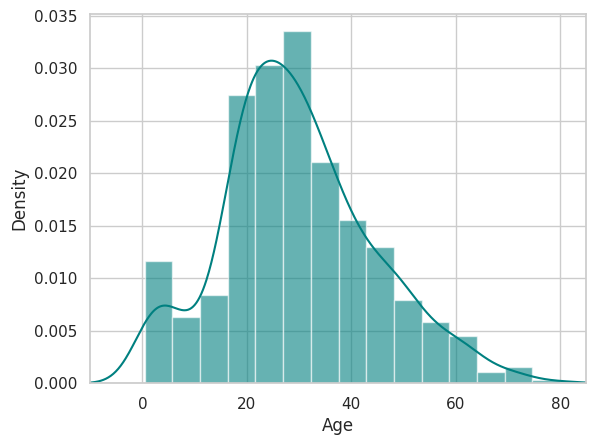

In [51]:
ax = train_df['Age'].hist(bins=15, density= True , stacked=True,color='teal', alpha=0.6)
train_df['Age'].plot(kind='density',color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

"Age" is right skewed, using the mean might give us biased results by filling in ages that are older than desired.We'll use the median to impute the missing values.

In [52]:
print('The mean of "Age" is %.2f' %(train_df['Age'].mean(skipna=True)))
#(skipna=True) = Exclude the NA/null values when computing the result.

print('The median of "Age" is %.2f' %(train_df['Age'].median(skipna=True)))

The mean of "Age" is 29.70
The median of "Age" is 28.00


cabin's missing values


In [53]:
print('Percentage of missing "Cabin" records is %.2f%%' %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))

Percentage of missing "Cabin" records is 77.10%


Here 77% of cabin records are missing so we'll ignore this one in our model.

Embarked missing values

In [54]:
print('Percentage of missing "Embarked" records is %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

Percentage of missing "Embarked" records is 0.22%


There are only 2 missing values for "Embarked", so we can just impute with the port where most people boarded.

In [55]:
print('Boarded passengers grouped by port of embarkation (C =Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df['Embarked'].value_counts())


Boarded passengers grouped by port of embarkation (C =Cherbourg, Q = Queenstown, S = Southampton):
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


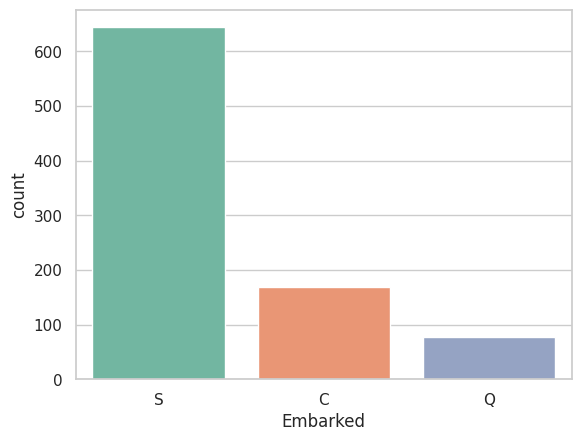

In [56]:
sns.countplot(x='Embarked', data=train_df, palette='Set2')
plt.show()

In [57]:
print('Most common boarding port of embarkation is %s.' %train_df['Embarked'].value_counts().idxmax())

Most common boarding port of embarkation is S.


By far the most passengers boarded in Southhampton, so we'll impute those 2 NaN's w/ "S".

Final adjustments to data -Train and Test data

In [58]:
train_data = train_df.copy()


filled age column with median

In [59]:
train_data['Age'].fillna(train_df['Age'].median(skipna=True),inplace = True)

for missing values of embarked column we Imputed it with "S"(most common boarding port)
and droped cabin column 

In [60]:
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(),inplace=True)
train_data.drop('Cabin',axis=1,inplace=True)

In [61]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [62]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


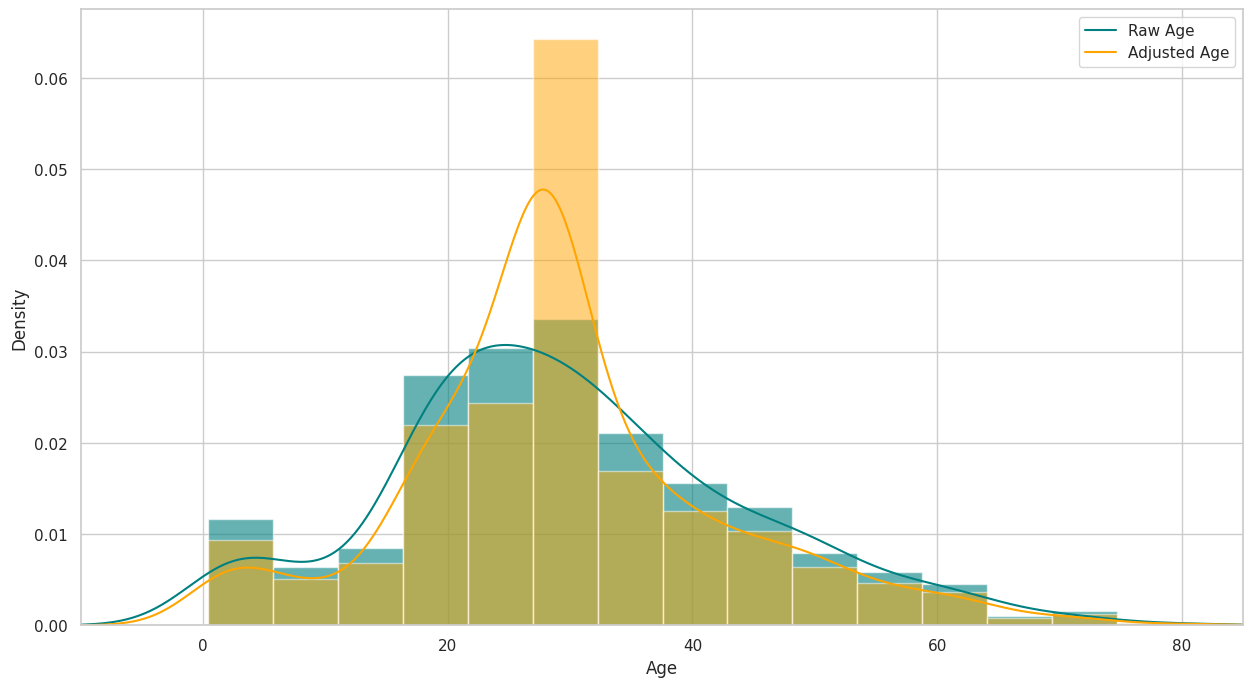

In [63]:
plt.figure(figsize=(15,8))
ax = train_df["Age"].hist(bins=15,density=True,stacked = True,color='teal',alpha = 0.6)
train_df['Age'].plot(kind='density',color='teal')

ax = train_data["Age"].hist(bins=15,density=True,stacked = True,color='orange',alpha = 0.5)
train_data["Age"].plot(kind='density',color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()


Now, both SibSp and parch relate to traveling with family.
So we'll combine these into categorical predictor: whether or not that individual was traveling alone.

In [64]:
train_data['TravelAlone'] = np.where((train_data['SibSp']+train_data['Parch'])>0,0,1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch',axis=1,inplace=True)

now create categorical variables for Pclass, Gender, Embarked.

In [65]:
training = pd.get_dummies(train_data,columns=['Pclass','Embarked','Sex'],dtype=int)
training.head(2)

,PassengerId,Survived,Name,Age,Ticket,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,0,0,1,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,1,0,0,1,0,0,1,0


and drop some variables which are not important

In [66]:
training.drop('Sex_female',axis=1,inplace=True)
training.drop('PassengerId',axis=1,inplace=True)
training.drop('Name',axis=1,inplace=True)
training.drop('Ticket',axis=1,inplace=True)

final_train = training
final_train.head(3)

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0


Apply the same changes to the test data as well

In [67]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [68]:
test_data = test_df.copy()      

In [69]:
test_data['Age'].fillna(test_df['Age'].median(skipna=True),inplace=True)

In [70]:
test_data['Fare'].fillna(train_df['Fare'].median(skipna=True),inplace=True)

In [71]:
test_data.drop('Cabin',axis=1,inplace=True)

In [72]:
test_data['TravelAlone'] = np.where((test_data['SibSp']+test_data['Parch'])>0,0,1)
test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch',axis=1,inplace=True)

In [73]:
testing = pd.get_dummies(test_data,columns=['Pclass','Embarked','Sex'],dtype=int)
testing.head(2)

,PassengerId,Name,Age,Ticket,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,892,"Kelly, Mr. James",34.5,330911,7.8292,1,0,0,1,0,1,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,363272,7.0000,0,0,0,1,0,0,1,1,0


In [74]:
testing.drop('Sex_female',axis=1,inplace=True)
testing.drop('PassengerId',axis=1,inplace=True)
testing.drop('Name',axis=1,inplace=True)
testing.drop('Ticket',axis=1,inplace=True)

final_test = testing
final_test.head(3)

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1


3. Exploratory Data Analysis

Exploration of age column

kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset. represents the data using a continuous probability density curve in one or more dimensions.

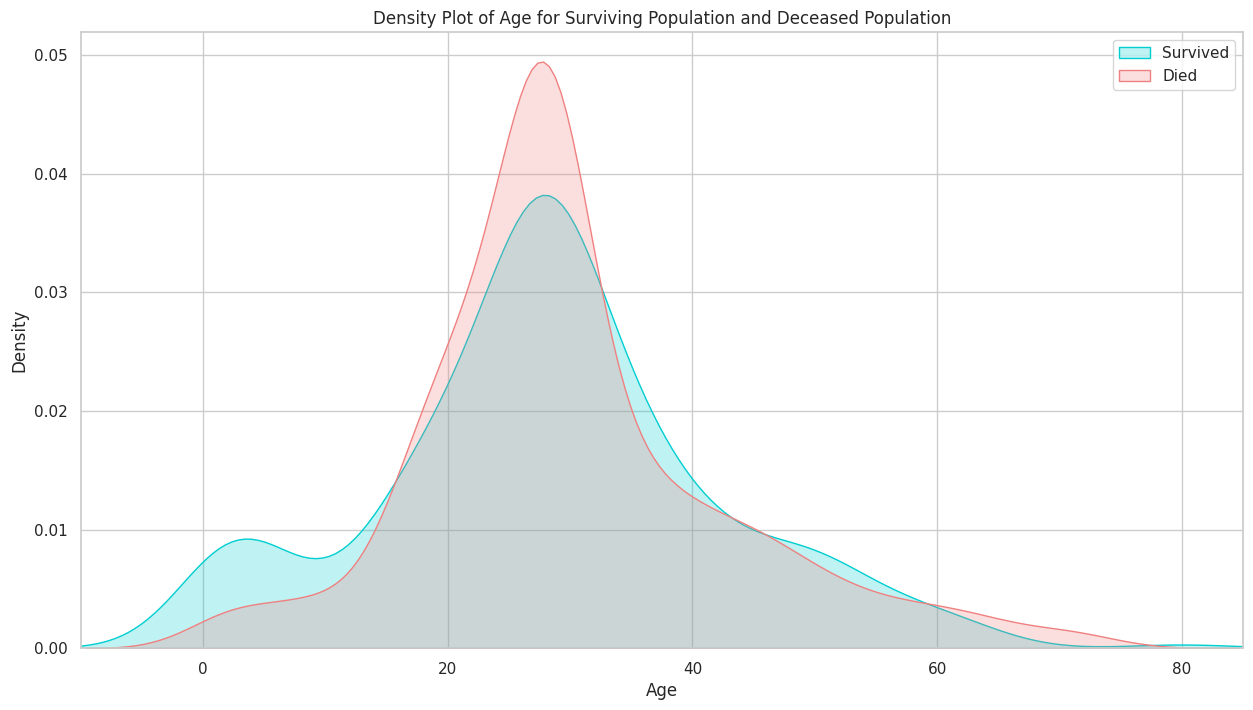

In [75]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train['Age'][final_train.Survived == 1], color = 'darkturquoise',shade = True)

sns.kdeplot(final_train['Age'][final_train.Survived == 0], color = 'lightcoral', shade = True)
plt.legend(['Survived','Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

We can see, the age distribution for survivors and deceased is actually very similar. One notable difference is that, of the survivors, a larger proportion were children. 

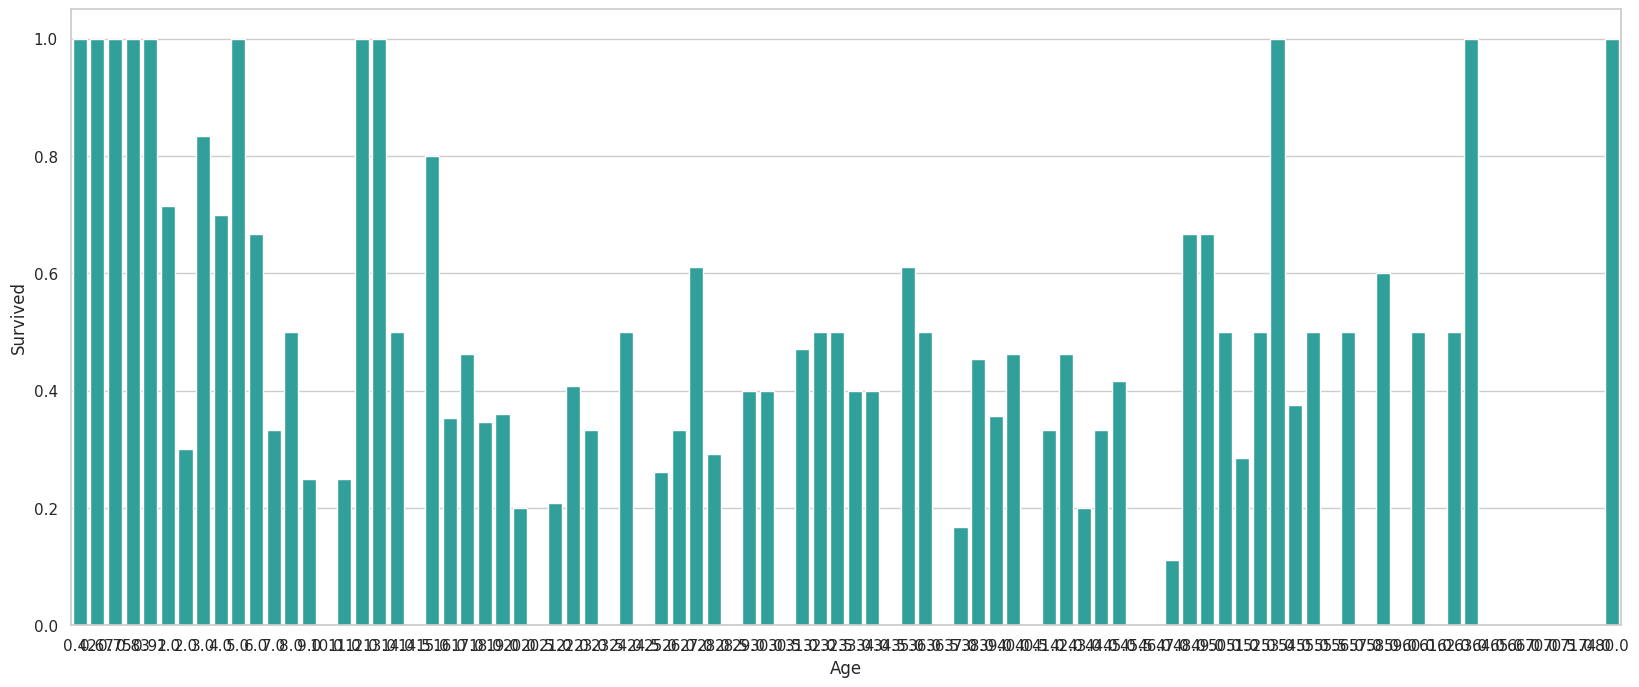

In [76]:
plt.figure(figsize=(20,8))
avg_survival = final_train[['Age','Survived']].groupby(['Age'],as_index=False).mean()
g = sns.barplot(x='Age',y = 'Survived',data = avg_survival, color='LightSeaGreen')
plt.show()

now we'll create survival rate of passenger under 16, here include another categorical variable in dataset: "Minor"

In [77]:
final_train['IsMinor']=np.where(final_train['Age']<=16, 1, 0)

final_test['IsMinor']=np.where(final_test['Age']<=16, 1, 0)

Exploration of Fare column

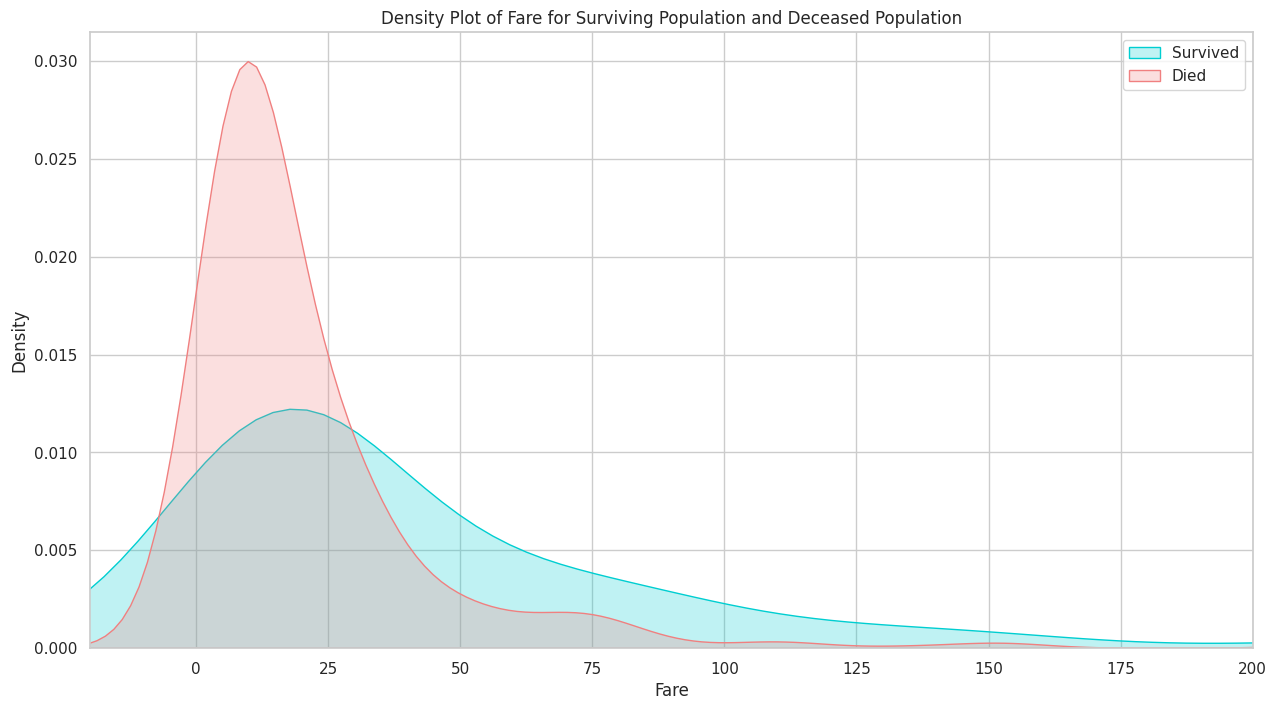

In [78]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True)

sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", shade=True)

plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

Passengers who paid lower fare appear to have been less likely to survive.

Exploration of Passenger class

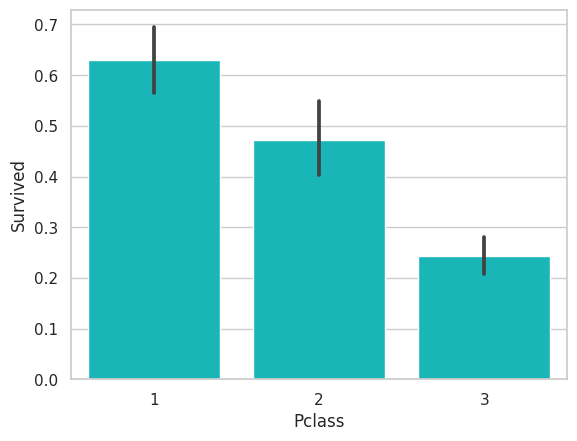

In [85]:
sns.barplot(x = 'Pclass',y= 'Survived', data=train_df, color="darkturquoise")
plt.show()

Here we can see, being a first class passenger was safest.

Exploration of embarked port

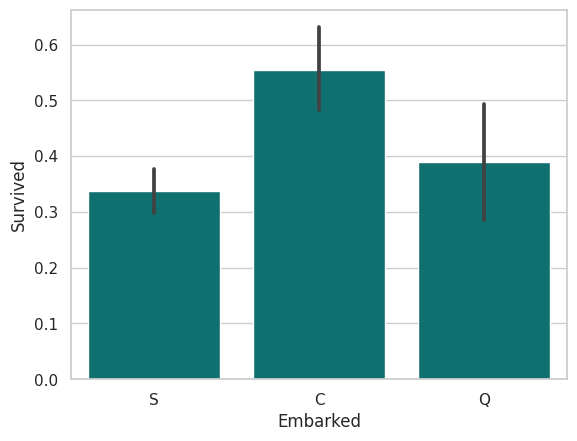

In [86]:
sns.barplot(x = 'Embarked',y = 'Survived',data = train_df,color='teal')
plt.show()

Exploration of traveling alone and with family

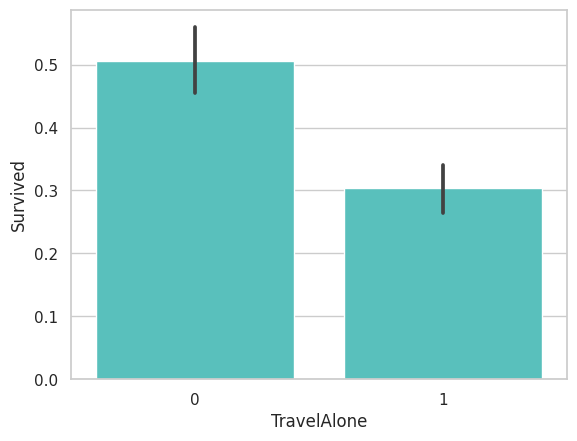

In [87]:
sns.barplot(x = 'TravelAlone', y = 'Survived', data = final_train, color = 'mediumturquoise')
plt.show()

who traveling alone are likely to die more then those with the family

Exploration of gender column

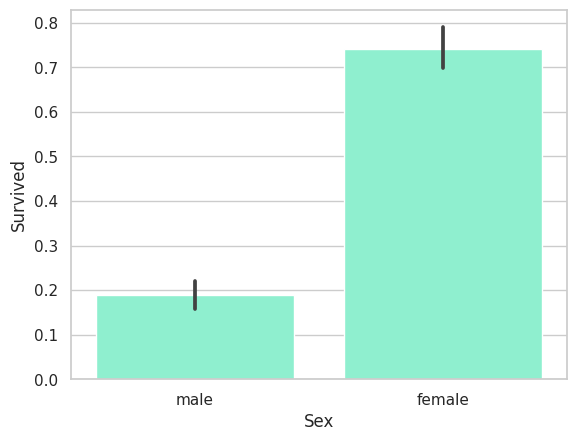

In [88]:
sns.barplot(x = 'Sex', y = 'Survived', data = train_df, color = 'aquamarine')
plt.show()

4. Logistic Regression Model

Logistic Function

In [98]:
def logistic(x):
    y = 1/ (1+ np.exp(-x))
    return y

x, x_arr = 0, np.array([-5,-1,1,5])
print(f"logistic({x}) = {logistic(x)}")
print(f"logistic({x_arr}) = {logistic(x_arr)}")



logistic(0) = 0.5
logistic([-5 -1  1  5]) = [0.00669285 0.26894142 0.73105858 0.99330715]


plotting the logistic function

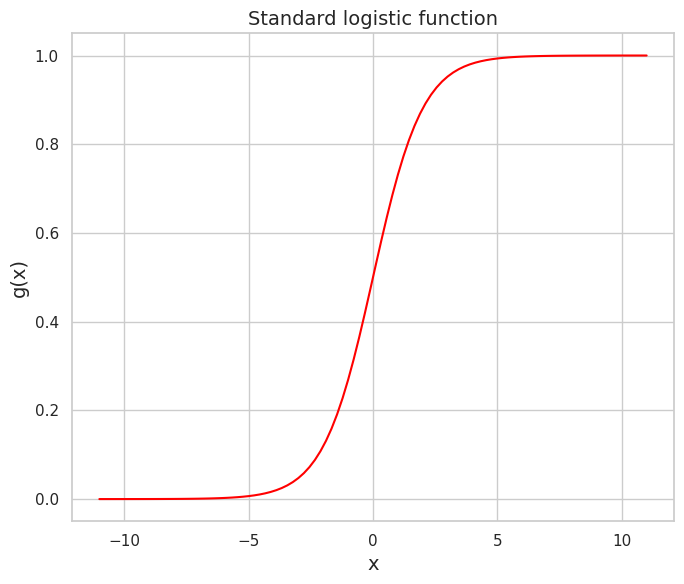

In [103]:
plt.figure(figsize = (7,6))
x = np.linspace(-11,11,100)

plt.plot(x , logistic(x), color = 'red')
plt.xlabel('x', fontsize = 14)
plt.ylabel('g(x)', fontsize = 14)
plt.title("Standard logistic function", fontsize = 14)
plt.tight_layout()
plt.show()

Log Loss function

In [111]:
def log_loss(y,y_hat):
    loss = -(y*np.log(y_hat)) - ((1-y) * np.log(1-y_hat))
    return loss

y, y_hat = 0,0.5
print(f"log_loss({y},{y_hat}) = {log_loss(y, y_hat)}")


log_loss(0,0.5) = 0.6931471805599453


plotting log loss

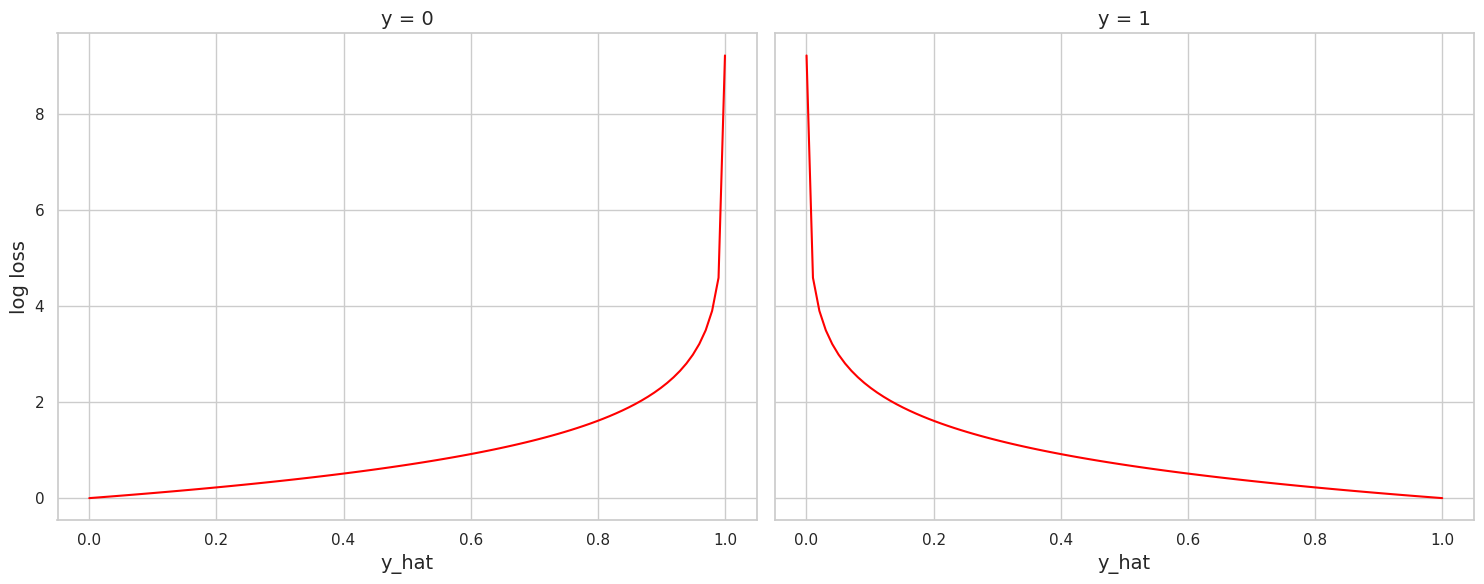

In [112]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
y_hat = np.linspace(0.0001, 0.9999, 100)
ax[0].plot(y_hat, log_loss(0, y_hat), color = 'red')
ax[0].set_title("y = 0", fontsize = 14)
ax[0].set_xlabel("y_hat", fontsize = 14)
ax[0].set_ylabel("log loss", fontsize = 14)

ax[1].plot(y_hat, log_loss(1, y_hat), color = 'red')
ax[1].set_title("y = 1", fontsize = 14)
ax[1].set_xlabel("y_hat", fontsize = 14)
plt.tight_layout()
plt.show()

Cost Function

cost function using for loop

In [114]:
def cost_func(y,y_hat):
    assert len(y) == len(y_hat), "Length of true values and length of predicted values do not match!"
    
    m = len(y)
    cost = 0
    for i in range(m):
        cost += log_loss(y[i],y_hat[i])
    cost = cost / m
    return cost


In [115]:
y, y_hat = np.array([0,1,0]), np.array([0.4,0.6,0.25])
print(f"cost_func({y},{y_hat}) = {cost_func(y,y_hat)}")

cost_func([0 1 0],[0.4  0.6  0.25]) = 0.43644443999458743


cost function using vectorization

In [117]:
def cost_func_vec(y, y_hat):
    assert len(y) == len(y_hat), "Length of true values and length of predicted values do not match!"
    m = len(y)
    loss_vec = np.array([log_loss(y[i], y_hat[i]) for i in range(m)])
    cost = np.dot(loss_vec, np.ones(m))/m
    return cost

y, y_hat = np.array([0,1,0]), np.array([0.4,0.6,0.25])
print(f"cost_func_vec({y},(y_hat) = {cost_func_vec(y, y_hat)}")

cost_func_vec([0 1 0],(y_hat) = 0.43644443999458743


Compute cost function in terms of model parameters- using for loop

In [118]:
def cost_logreg(X,y,w,b):
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"

    z = []
    for i in range(m):
        s = 0
        for j in range(n):
            s += X[i, j] * w[j]
        z.append(s + b)
    z = np.array(z)
    y_hat = logistic(z)
    cost = cost_func(y, y_hat)
    return cost

X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"cost_logreg(X = {X}, y = {y}, w = {w}, b = {b}) = {cost_logreg(X, y, w, b)}")

cost_logreg(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = 5.500008350784906


Compute cost function in terms of model parameters- using vectorization

In [121]:
def cost_logreg_vec(X,y,w,b):
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    
    z = np.matmul(X, w) + (b * np.ones(m))
    y_dash = logistic(z)
    cost = cost_func_vec(y, y_dash)
    return cost

X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"cost_logreg_vec(X = {X}, y = {y}, w = {w}, b = {b}) = {cost_logreg(X, y, w, b)}")

cost_logreg_vec(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = 5.500008350784906


Plotting cost function against model parameters

In [123]:
from mpl_toolkits.mplot3d import Axes3D

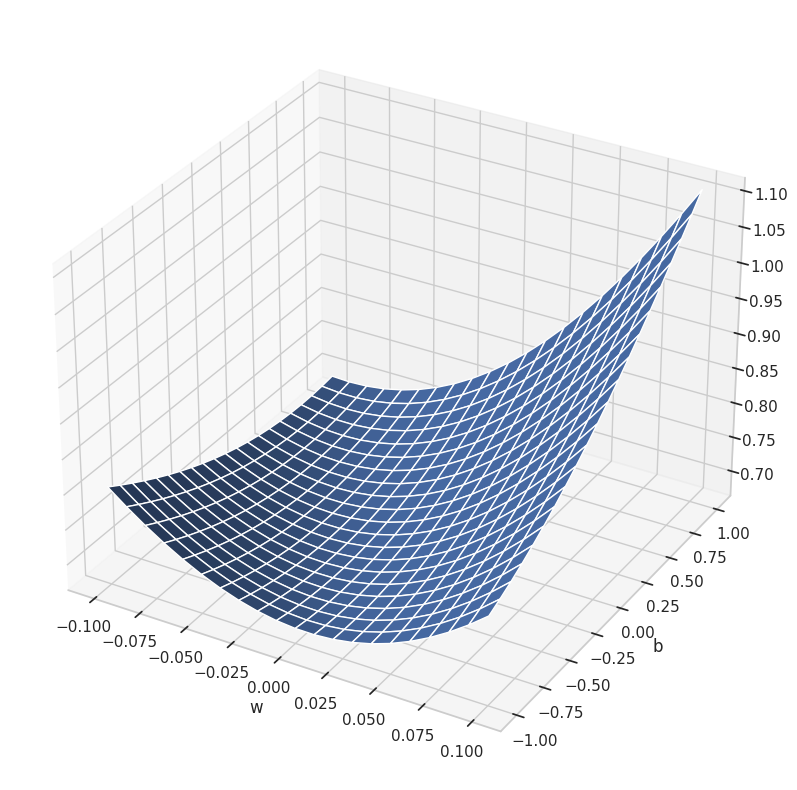

In [126]:
w, b = np.meshgrid(np.linspace(-0.1, 0.1, 21), np.linspace(-1, 1, 21))
X = np.array([1.56, 0.76 , 0.08, 9.71, 4.65, 4.35, 7.34, 0.91, 9.82, 9.05]).reshape((10, 1))
y = np.array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0])
cost = np.array([[cost_logreg_vec(X, y, np.array([w0]), b0) for b0 in b[:, 0]] for w0 in w[0]])
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')
ax.plot_surface(w, b, cost)
ax.set(xlabel = "w", ylabel = "b")
plt.show()

Gradient Descent

Compute gradients of cost function using for loop

In [128]:
def grad_logreg(X,y,w,b):
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"

    grad_w, grad_b = np.zeros(n),0
    for i in range(m):
        s = 0
        for j in range(n):
            s+= X[i,j]*w[j]
        y_hat_i = logistic(s+b)
        for j in range(n):
            grad_w[j] += (y_hat_i - y[i])* X[i,j]
        
        grad_b += y_hat_i - y[i]
    grad_w, grad_b = grad_w/ m, grad_b / m
    return grad_w, grad_b


In [129]:
X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"grad_logreg(X = {X}, y = {y}, w = {w}, b = {b}) = {grad_logreg(X, y, w, b)}")

grad_logreg(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = (array([-4.99991649,  4.99991649]), 0.4999916492890759)


Compute gradients of cost function with respect to model parameters- using vectorizaton

In [132]:
def grad_logreg_vec(X,y,w,b):
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"

    y_hat = logistic(np.matmul(X, w) + b * np.ones(m))
    grad_w = np.matmul(y_hat - y, X) / m
    grad_b = np.dot(y_hat - y, np.ones(m)) / m
    return grad_w, grad_b


In [133]:
X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"grad_logreg_vec(X = {X}, y = {y}, w = {w}, b = {b}) = {grad_logreg_vec(X, y, w, b)}")

grad_logreg_vec(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = (array([-4.99991649,  4.99991649]), 0.4999916492890759)


Gradient descent algorithm for logistic regression

In [145]:
import itertools, math

In [146]:
def grad_desc(X,y,w,b, alpha, n_iter, show_cost = True, show_params = False):
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"

    cost_history, params_history = [], []
    for i , j in itertools.product(range(n_iter), range(1)):
        grad_w, grad_b = grad_logreg_vec(X,y,w,b)
        w += -alpha * grad_w
        b += -alpha * grad_b

        cost = cost_logreg_vec(X,y,w,b)
        cost_history.append(cost)
        params_history.append([w,b])
        if show_cost == True and show_params == False and (i % math.ceil(n_iter/10) == 0 or i == n_iter - 1):
            print(f"Iteration {i:6}: Cost{float(cost_history[i]) :3.4f}")
        if show_cost == True and show_params == True and (i % math.ceil(n_iter/10) == 0 or i == n_iter - 1):
            print(f"Iteration {i:6}: Cost {float(cost_history[i]):3.4f}, Params{params_history[i]}")
    return w, b, cost_history, params_history

In [147]:
X, y, w, b, alpha, n_iter = np.array([[0.1, 0.2], [-0.1, 0.1]]), np.array([1, 0]), np.array([0., 0.]), 0., 0.1, 100000
w_out, b_out, cost_history, params_history = grad_desc(X, y, w, b, alpha, n_iter, show_cost = True, show_params = True)

Iteration      0: Cost 0.6928, Params[array([0.005 , 0.0025]), 0.0]
Iteration  10000: Cost 0.0867, Params[array([19.30073125,  9.43918518]), -1.407869658536168]
Iteration  20000: Cost 0.0430, Params[array([25.11290735, 12.28127422]), -1.8345297190719225]
Iteration  30000: Cost 0.0283, Params[array([28.51960605, 13.947125  ]), -2.084520137444322]
Iteration  40000: Cost 0.0211, Params[array([30.9258698 , 15.12377399]), -2.2610727540006015]
Iteration  50000: Cost 0.0168, Params[array([32.78441957, 16.03259549]), -2.397428663482232]
Iteration  60000: Cost 0.0139, Params[array([34.29765304, 16.77255979]), -2.508444865872566]
Iteration  70000: Cost 0.0119, Params[array([35.57340822, 17.39639871]), -2.6020359756178215]
Iteration  80000: Cost 0.0104, Params[array([36.67589743, 17.93551157]), -2.6829142826174595]
Iteration  90000: Cost 0.0092, Params[array([37.64642667, 18.4100967 ]), -2.7541108549220765]
Iteration  99999: Cost 0.0083, Params[array([38.51304248, 18.83386869]), -2.81768366263258

plotting cost over iteration

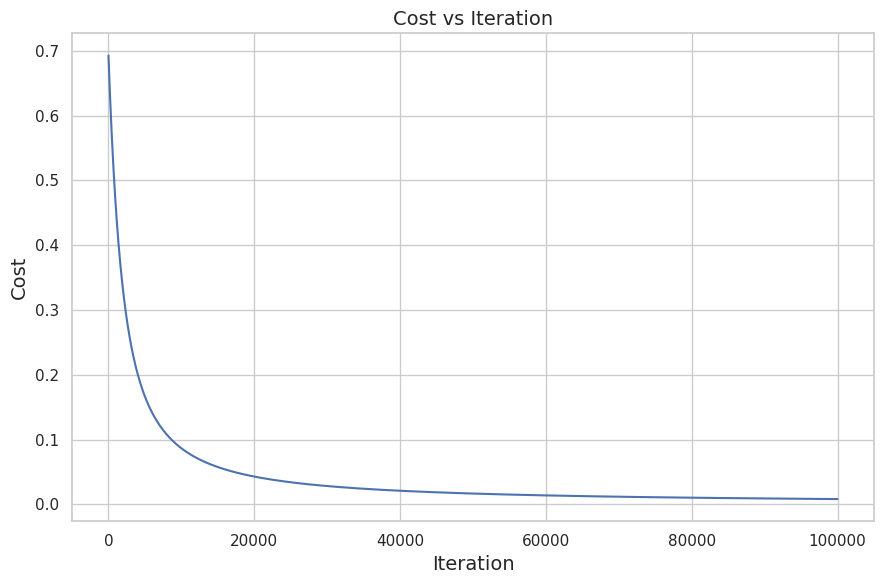

In [148]:
plt.figure(figsize = (9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Cost", fontsize = 14)
plt.title("Cost vs Iteration", fontsize = 14)
plt.tight_layout()
plt.show()

Splitting the data into train and test data

In [ ]:
final_train.head(2)

In [158]:
cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X_train = final_train[cols]
y_train = final_train['Survived']


,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Embarked_C,Embarked_S,Sex_male,IsMinor
0,22.0,7.2500,0,0,0,0,1,1,0
1,38.0,71.2833,0,1,0,1,0,0,0
2,26.0,7.9250,1,0,0,0,1,0,0
3,35.0,53.1000,0,1,0,0,1,0,0
4,35.0,8.0500,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,1,0,1,0,1,1,0
887,19.0,30.0000,1,1,0,0,1,0,0
888,28.0,23.4500,0,0,0,0,1,0,0
889,26.0,30.0000,1,1,0,1,0,1,0


Model Fitting

In [160]:
#initial values of model parameters
w_init = np.zeros(X_train.shape[1]).astype(float)
b_init = 0


In [162]:
#learning model parameters using gradient descent algorithm
w_out, b_out, cost_history, params_history = grad_desc(X_train.to_numpy(),
y_train.to_numpy(),
w = w_init,
b = b_init,
alpha = 0.005,
n_iter = 100000)


Iteration      0: Cost0.5950
Iteration  10000: Cost0.4906
Iteration  20000: Cost0.4748
Iteration  30000: Cost0.4711
Iteration  40000: Cost0.4700
Iteration  50000: Cost0.4695
Iteration  60000: Cost0.4693
Iteration  70000: Cost0.4693
Iteration  80000: Cost0.4692
Iteration  90000: Cost0.4692
Iteration  99999: Cost0.4883


plotting cost over iteration

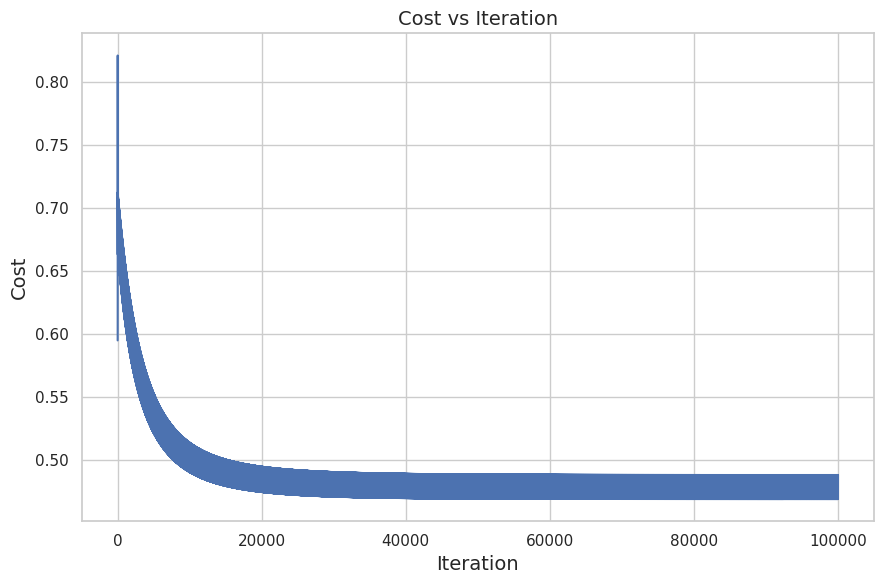

In [163]:
plt.figure(figsize = (9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Cost", fontsize = 14)
plt.title("Cost vs Iteration", fontsize = 14)
plt.tight_layout()
plt.show()

In [164]:
#final parameter values
params_history[-1]

[array([-0.02047143,  0.01721129,  0.33731108,  2.12294479,  1.31911371,
         0.19161645, -0.41458187, -2.77642252,  0.62527062]),
 0.9276261807446533]

Prediction and Evaluation

In [167]:
def conf_mat(y_train, y_pred):
    y_train, y_pred = list(y_train), list(y_pred)
    count, labels, confusion_mat = len(y_train), [0, 1], np.zeros(shape = (2, 2), dtype = int)
    for i in range(2):
        for j in range(2):
            confusion_mat[i][j] = len([k for k in range(count) if y_train[k] == labels[i] and y_pred[k] == labels[j]])
    return confusion_mat

In [168]:
def conf_mat_heatmap(y_train, y_pred):
    """
    Prints confusion matrix
    Args:
      y_test (array_like): true binary (0 or 1) labels
      y_pred (array_like): predicted binary (0 or 1) labels
    Returns:
      Nothing, prints a heatmap representing a 2x2 confusion matrix
    """
    confusion_mat = conf_mat(y_train, y_pred)
    labels, confusion_mat_df = [0, 1], pd.DataFrame(confusion_mat, range(2), range(2))
    plt.figure(figsize = (6, 4.75))
    sns.heatmap(confusion_mat_df, annot = True, annot_kws = {"size": 16}, fmt = 'd')
    plt.xticks([0.5, 1.5], labels, rotation = 'horizontal')
    plt.yticks([0.5, 1.5], labels, rotation = 'horizontal')
    plt.xlabel("Predicted label", fontsize = 14)
    plt.ylabel("True label", fontsize = 14)
    plt.title("Confusion Matrix", fontsize = 14)
    plt.grid(False)
    plt.show()

In [169]:
def accuracy(y_train, y_pred):
    """
    Computes accuracy, given true and predicted binary (0 or 1) labels
    Args:
      y_test (array_like): true binary (0 or 1) labels
      y_pred (array_like): predicted binary (0 or 1) labels
    Returns:
      acc (float): accuracy obtained from y_test and y_pred
    """
    confusion_mat = conf_mat(y_train, y_pred)
    num = confusion_mat[0, 0] + confusion_mat[1, 1] # Number of correct predictions
    denom = num + confusion_mat[0, 1] + confusion_mat[1, 0] # Number of total predictions
    acc = num / denom
    return acc

In [170]:
y_train_prob = logistic(np.matmul(X_train.to_numpy(), w_out) + (b_out * np.ones(X_train.shape[0])))
y_train_pred= (y_train_prob > 0.5).astype(int)
print(pd.Series({"Training accuracy": accuracy(y_train, y_train_pred)}))


Training accuracy    0.772166
dtype: float64


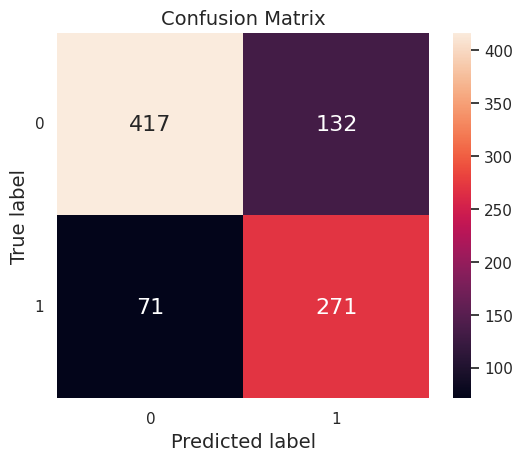

In [171]:
conf_mat_heatmap(y_train, y_train_pred)